In [144]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from cmath import *
%matplotlib notebook

last_figure = (None, None)

def plot(p, x_min=0, x_max=1, use_last_figure=False):
    global last_figure
    if use_last_figure:
        (fig, ax) = last_figure
    else:
        fig = plt.figure()
        ax = plt.axes()
    last_figure = (fig, ax)

    ax.set_aspect(1.0)
    ax.grid(color='b', alpha=0.1)

#     ax.spines['left'].set_position('center')
#     ax.spines['bottom'].set_position('center')

#     # Eliminate upper and right axes
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')

#     # Show ticks in the left and lower axes only
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
#     ax.set_xticks([x_min, x_max])
#     ax.set_yticks([0, 1])
    
    xs = np.linspace(x_min, x_max, abs(x_min - x_max) * 10)
    ys = np.vectorize(p)(xs)
    plt.plot(xs, ys)
    fig.show()


# n=0 polynomial

<IPython.core.display.Javascript object>


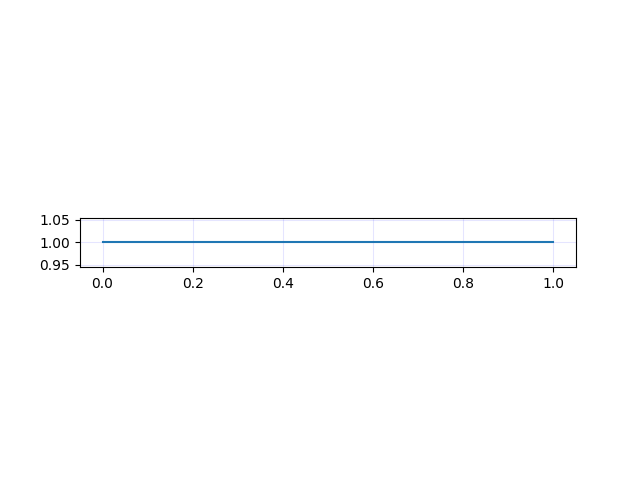

In [145]:
def P(x):
    return 1.0

plot(P)

# n=1 polynomial

<IPython.core.display.Javascript object>


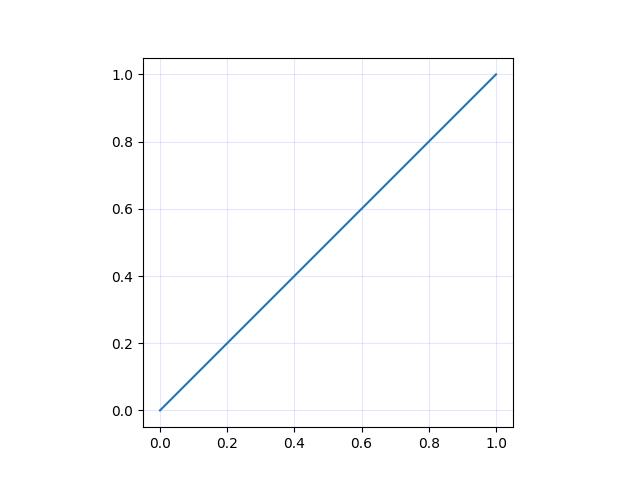

In [146]:
def P(x, an):
    return an[0] * x + an[1]

plot(lambda x: P(x, [1, 0]))

# n=2 polynomial

<IPython.core.display.Javascript object>


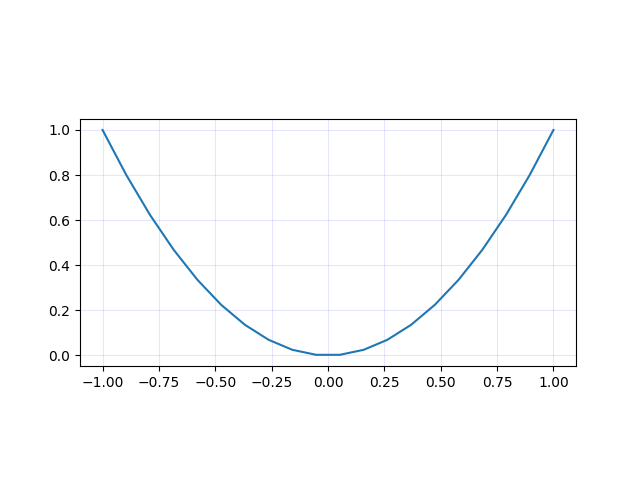

In [147]:
def P(x):
    a = 1
    b = 0
    c = 0
    return a * (x**2) + b * x + c

plot(P, -1, 1)

## quadratic with vertex
`def quadratic` is called the "standard form of qudratic". `x0` and `y0` are coordinates of parabolla vertex. The porabolla vertex is porabolla's extremum.

<IPython.core.display.Javascript object>


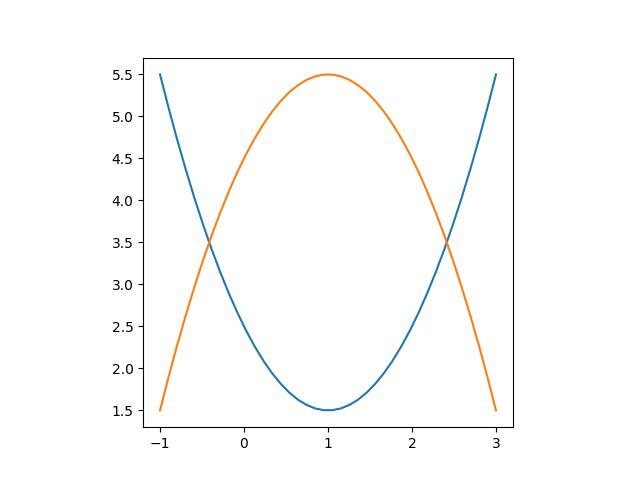

In [150]:
def quadratic(a, x0, y0):
    return (lambda x: a * ((x - x0)**2) + y0)
plot(quadratic(1, 1, 1.5), -1, 3)
plot(quadratic(-1, 1, 5.5), -1, 3, use_last_figure=True)

In [ ]:
def y_intercepts(P):
    return P(0)
def x_intercepts